# Keyframe Extraction

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

import cv2
from IPython.display import display, clear_output
from PIL import Image

import os
import sys
import glob
import re
import warnings
from random import shuffle

from decord import VideoReader
from decord import gpu, cpu

# Reload changed modules every time
%load_ext autoreload
%autoreload 2

In [4]:
sys.path.insert(0, '/mnt/rds/redhen/gallina/home/hxm471/RedHenLab-Multimodal_TV_Show_Segmentation/mtvss/')
import constants as const
sys.path.insert(0, '/mnt/rds/redhen/gallina/home/hxm471/RedHenLab-Multimodal_TV_Show_Segmentation/mtvss/pipeline_stage1')
import run_pipeline_stage1
from data import Data
from model import Model
sys.path.insert(0, '/mnt/rds/redhen/gallina/home/hxm471/RedHenLab-Multimodal_TV_Show_Segmentation/inaSpeechSegmenter/inaSpeechSegmenter')
from segmenter import Segmenter

In [5]:
keyframes_path = const.H_GAL_HOME_PATH+"keyframes/keyframes"
# Print gallina home directory path
const.H_GAL_HOME_PATH

'/mnt/rds/redhen/gallina/home/hxm471/'

In [6]:
output_path = const.H_GAL_HOME_PATH+'/image_dataset'

## Convert Files to JPEG

In [5]:
for f in glob.glob(output_path+"/*/*"):
    if(not f[-5:]=='.jpeg'):
        print(f)
        new_name = f+".jpeg"
        os.rename(f, new_name)

## Check Existing Keyframes 

In [6]:
counter_dict = {}

In [7]:
def update_keyframe_count(counter_dict):
    for file in glob.glob(keyframes_path+'/*'):
        basename=os.path.basename(file)
#         print(file)
        if(counter_dict.get(basename[0:4])==None):
            counter_dict.update({basename[0:4]:0})
        else:
            counter_dict.update({basename[0:4]:counter_dict.get(basename[0:4])+1})
    for file in glob.glob('/scratch/users/hxm471/keyframes/*'):
        basename=os.path.basename(file)
#         print(file)
        if(counter_dict.get(basename[0:4])==None):
            counter_dict.update({basename[0:4]:0})
        else:
            counter_dict.update({basename[0:4]:counter_dict.get(basename[0:4])+1})
def remove_lower_count(counter_dict):
    counter_dict_new = {}
    items = counter_dict.items()
    for year_count in items:
        print(year_count)
        if(year_count[1]<=10):
            continue
        else:
            counter_dict_new.update({year_count[0]:year_count[1]})
    return counter_dict_new

In [8]:
update_keyframe_count(counter_dict)
counter_dict = remove_lower_count(counter_dict)
counter_dict

('2002', 11)
('2005', 12)
('2006', 58)
('1995', 11)
('1997', 11)
('2000', 11)
('1996', 11)
('1998', 11)
('2001', 7)
('2003', 1)


{'2002': 11,
 '2005': 12,
 '2006': 58,
 '1995': 11,
 '1997': 11,
 '2000': 11,
 '1996': 11,
 '1998': 11}

## Extract Keyframes

### From Scratch Workspace

In [9]:
const.SCRATCH_PATH

'/scratch/users/hxm471/'

In [10]:
os.getcwd()

'/mnt/rds/redhen/gallina/home/hxm471/RedHenLab-Multimodal_TV_Show_Segmentation/notebooks'

In [11]:
m_obj = Model(None,True,None,True)

In [79]:
files = glob.glob(const.SCRATCH_PATH+'tmp/*_feats.csv')
shuffle(files)
# print(files)
for f in files:
    update_keyframe_count(counter_dict)
    counter_dict = remove_lower_count(counter_dict)
    if(os.path.basename(f)[:4] in counter_dict):
        continue
    csv_path = f[:-10]+'.csv'
    print(csv_path)
    m_obj.set_csv_path(f[:-10]+'.csv')

    m_obj.keyframe_extraction(gpu_enable=False,file_spec=False)

('2006', 176)
('2002', 9)
('2005', 6)
('1995', 5)
('1997', 1)
('2000', 1)
/scratch/users/hxm471/tmp/2005-03-24_0000_US_00006145_V2_VHS10_MB9_H14_KP.csv

-- Step 3.1: Initializing Decord --

csv_path: /scratch/users/hxm471/tmp/2005-03-24_0000_US_00006145_V2_VHS10_MB9_H14_KP.csv
gpu enabled False
Length of vid: 886069

--- Starting Store Keyframe ---

## Saving images #

Path: /scratch/users/hxm471/keyframes/2005-03-24_0000_US_00006145_V2_VHS10_MB9_H14_KP_keyframes

## Saving Images Metadata ##

Path: /scratch/users/hxm471/keyframes/2005-03-24_0000_US_00006145_V2_VHS10_MB9_H14_KP_keyframes.txt
('2006', 235)
('2002', 9)
('2005', 8)
('1995', 5)
('1997', 1)
('2000', 1)
/scratch/users/hxm471/tmp/1997-11-24_0000_US_00017513_V1_VHS42_MB6_H20_GS.csv

-- Step 3.1: Initializing Decord --

csv_path: /scratch/users/hxm471/tmp/1997-11-24_0000_US_00017513_V1_VHS42_MB6_H20_GS.csv
gpu enabled False
Length of vid: 885684

--- Starting Store Keyframe ---

## Saving images #

Path: /scratch/users/hxm471/k


--- Starting Store Keyframe ---

## Saving images #

Path: /scratch/users/hxm471/keyframes/1995-07-27_0000_US_NA051822_V1_VHS51_MB11_H27_MM_keyframes

## Saving Images Metadata ##

Path: /scratch/users/hxm471/keyframes/1995-07-27_0000_US_NA051822_V1_VHS51_MB11_H27_MM_keyframes.txt
('2006', 1592)
('2005', 259)
('2002', 227)
('1995', 11)
('1997', 3)
('2000', 3)
('1996', 3)
('1998', 1)
('2006', 1651)
('2005', 272)
('2002', 239)
('1995', 23)
('1997', 3)
('2000', 3)
('1996', 3)
('1998', 1)
('2006', 1710)
('2005', 285)
('2002', 251)
('1995', 35)
('1997', 3)
('2000', 3)
('1996', 3)
('1998', 1)
('2006', 1769)
('2005', 298)
('2002', 263)
('1995', 47)
('1997', 3)
('2000', 3)
('1996', 3)
('1998', 1)
/scratch/users/hxm471/tmp/1997-02-06_0000_US_00026112_V2_VHS15_MB4_H12_JS.csv

-- Step 3.1: Initializing Decord --

csv_path: /scratch/users/hxm471/tmp/1997-02-06_0000_US_00026112_V2_VHS15_MB4_H12_JS.csv
gpu enabled False
Length of vid: 887029

--- Starting Store Keyframe ---

## Saving images #

Pat

Length of vid: 510590

--- Starting Store Keyframe ---

## Saving images #

Path: /scratch/users/hxm471/keyframes/1996-09-30_0000_US_00013812_V3_VHSP11_MB6_H8_GG_keyframes

## Saving Images Metadata ##

Path: /scratch/users/hxm471/keyframes/1996-09-30_0000_US_00013812_V3_VHSP11_MB6_H8_GG_keyframes.txt
('2006', 3244)
('2005', 623)
('2002', 563)
('1995', 347)
('1997', 71)
('2000', 3)
('1996', 9)
('1998', 5)
('2001', 1)
/scratch/users/hxm471/tmp/2000-02-23_0000_US_00012482_V3_VHSP11_M2_H4_WC.csv

-- Step 3.1: Initializing Decord --

csv_path: /scratch/users/hxm471/tmp/2000-02-23_0000_US_00012482_V3_VHSP11_M2_H4_WC.csv
gpu enabled False
Length of vid: 876431

--- Starting Store Keyframe ---

## Saving images #

Path: /scratch/users/hxm471/keyframes/2000-02-23_0000_US_00012482_V3_VHSP11_M2_H4_WC_keyframes

## Saving Images Metadata ##

Path: /scratch/users/hxm471/keyframes/2000-02-23_0000_US_00012482_V3_VHSP11_M2_H4_WC_keyframes.txt
('2006', 3303)
('2005', 636)
('2002', 575)
('1995', 359)
(


## Saving Images Metadata ##

Path: /scratch/users/hxm471/keyframes/2003-06-17_0000_US_00014753_V3_VHS28_MB3_E3_EM_keyframes.txt
('2006', 5663)
('2005', 1156)
('2002', 1055)
('1995', 839)
('1997', 563)
('1996', 467)
('2000', 7)
('1998', 9)
('2001', 1)
('2003', 1)
('2006', 5722)
('2005', 1169)
('2002', 1067)
('1995', 851)
('1997', 575)
('1996', 479)
('2000', 7)
('1998', 9)
('2001', 1)
('2003', 1)
('2006', 5781)
('2005', 1182)
('2002', 1079)
('1995', 863)
('1997', 587)
('1996', 491)
('2000', 7)
('1998', 9)
('2001', 1)
('2003', 1)
('2006', 5840)
('2005', 1195)
('2002', 1091)
('1995', 875)
('1997', 599)
('1996', 503)
('2000', 7)
('1998', 9)
('2001', 1)
('2003', 1)
('2006', 5899)
('2005', 1208)
('2002', 1103)
('1995', 887)
('1997', 611)
('1996', 515)
('2000', 7)
('1998', 9)
('2001', 1)
('2003', 1)
('2006', 5958)
('2005', 1221)
('2002', 1115)
('1995', 899)
('1997', 623)
('1996', 527)
('2000', 7)
('1998', 9)
('2001', 1)
('2003', 1)
('2006', 6017)
('2005', 1234)
('2002', 1127)
('1995', 911)
(

Length of vid: 885770

--- Starting Store Keyframe ---

## Saving images #

Path: /scratch/users/hxm471/keyframes/2000-08-15_0000_US_00011550_V3_VHS28_MB3_E3_MS_keyframes

## Saving Images Metadata ##

Path: /scratch/users/hxm471/keyframes/2000-08-15_0000_US_00011550_V3_VHS28_MB3_E3_MS_keyframes.txt
('2006', 9439)
('2005', 1988)
('2002', 1823)
('1995', 1607)
('1997', 1331)
('1996', 1235)
('1998', 611)
('2000', 9)
('2001', 1)
('2003', 1)
('2006', 9498)
('2005', 2001)
('2002', 1835)
('1995', 1619)
('1997', 1343)
('1996', 1247)
('1998', 623)
('2000', 9)
('2001', 1)
('2003', 1)
('2006', 9557)
('2005', 2014)
('2002', 1847)
('1995', 1631)
('1997', 1355)
('1996', 1259)
('1998', 635)
('2000', 9)
('2001', 1)
('2003', 1)
('2006', 9616)
('2005', 2027)
('2002', 1859)
('1995', 1643)
('1997', 1367)
('1996', 1271)
('1998', 647)
('2000', 9)
('2001', 1)
('2003', 1)
('2006', 9675)
('2005', 2040)
('2002', 1871)
('1995', 1655)
('1997', 1379)
('1996', 1283)
('1998', 659)
('2000', 9)
('2001', 1)
('2003', 1)

('2006', 23540)
('2005', 5095)
('2002', 4691)
('1995', 4475)
('1997', 4199)
('1996', 4103)
('1998', 3479)
('2000', 9)
('2001', 3)
('2003', 1)
('2006', 23599)
('2005', 5108)
('2002', 4703)
('1995', 4487)
('1997', 4211)
('1996', 4115)
('1998', 3491)
('2000', 9)
('2001', 3)
('2003', 1)
('2006', 23658)
('2005', 5121)
('2002', 4715)
('1995', 4499)
('1997', 4223)
('1996', 4127)
('1998', 3503)
('2000', 9)
('2001', 3)
('2003', 1)
('2006', 23717)
('2005', 5134)
('2002', 4727)
('1995', 4511)
('1997', 4235)
('1996', 4139)
('1998', 3515)
('2000', 9)
('2001', 3)
('2003', 1)
('2006', 23776)
('2005', 5147)
('2002', 4739)
('1995', 4523)
('1997', 4247)
('1996', 4151)
('1998', 3527)
('2000', 9)
('2001', 3)
('2003', 1)
('2006', 23835)
('2005', 5160)
('2002', 4751)
('1995', 4535)
('1997', 4259)
('1996', 4163)
('1998', 3539)
('2000', 9)
('2001', 3)
('2003', 1)
('2006', 23894)
('2005', 5173)
('2002', 4763)
('1995', 4547)
('1997', 4271)
('1996', 4175)
('1998', 3551)
('2000', 9)
('2001', 3)
('2003', 1)
('2006

Length of vid: 891469

--- Starting Store Keyframe ---

## Saving images #

Path: /scratch/users/hxm471/keyframes/2001-11-07_0000_US_00009208_V1_VHSP12_MB20_H17_AM_keyframes

## Saving Images Metadata ##

Path: /scratch/users/hxm471/keyframes/2001-11-07_0000_US_00009208_V1_VHSP12_MB20_H17_AM_keyframes.txt
('2006', 27847)
('2005', 6044)
('2002', 5567)
('1995', 5351)
('1997', 5075)
('1996', 4979)
('1998', 4355)
('2000', 515)
('2001', 5)
('2003', 1)
('2006', 27906)
('2005', 6057)
('2002', 5579)
('1995', 5363)
('1997', 5087)
('1996', 4991)
('1998', 4367)
('2000', 527)
('2001', 5)
('2003', 1)
('2006', 27965)
('2005', 6070)
('2002', 5591)
('1995', 5375)
('1997', 5099)
('1996', 5003)
('1998', 4379)
('2000', 539)
('2001', 5)
('2003', 1)
('2006', 28024)
('2005', 6083)
('2002', 5603)
('1995', 5387)
('1997', 5111)
('1996', 5015)
('1998', 4391)
('2000', 551)
('2001', 5)
('2003', 1)
('2006', 28083)
('2005', 6096)
('2002', 5615)
('1995', 5399)
('1997', 5123)
('1996', 5027)
('1998', 4403)
('2000', 56

In [12]:
counter_dict = {}
update_keyframe_count(counter_dict)
counter_dict = remove_lower_count(counter_dict)
counter_dict

('2002', 11)
('2005', 12)
('2006', 58)
('1995', 11)
('1997', 11)
('2000', 11)
('1996', 11)
('1998', 11)
('2001', 7)
('2003', 1)


{'2002': 11,
 '2005': 12,
 '2006': 58,
 '1995': 11,
 '1997': 11,
 '2000': 11,
 '1996': 11,
 '1998': 11}

### From Commercial Data

In [13]:
const.TMP_PATH

'/mnt/rds/redhen/gallina/home/hxm471/RedHenLab-Multimodal_TV_Show_Segmentation/mtvss/data/tmp/'

In [77]:
com_df = pd.read_csv(const.TMP_PATH+'commercial_filtered.csv')
com_df

Unnamed: 0  Counter  Row  ColumnCounter  \
0              0        1    1              1   
1              1        2    1              7   
2              2        3    1             13   
3              3        4    1             19   
4              4        5    1             25   
...          ...      ...  ...            ...   
3650        5868       17   77             97   
3651        5869       18   77            103   
3652        5870       19   77            109   
3653        5871       20   77            115   
3654        5872       21   77            121   

                                               Filename StartTime EndTime  \
0       1989 08 04 0000 US NA024556 V3 VHS24 MB2 H24 JM       424     424   
1       1989 08 04 0000 US NA024556 V3 VHS24 MB2 H24 JM       455     484   
2       1989 08 04 0000 US NA024556 V3 VHS24 MB2 H24 JM       485     514   
3       1989 08 04 0000 US NA024556 V3 VHS24 MB2 H24 JM       807     839   
4       1989 08 04 0000 US NA024556 V3 VHS24 MB2 H24 JM       839     868   
...                                                 ...       ...     ...   
3650  1989 09 23 0000 US NA025379 V11 VHS51 MB8 H16 ...      6112    6142   
3651  1989 09 23 0000 US NA025379 V11 VHS51 MB8 H16 ...      6453    6482   
3652  1989 09 23 0000 US NA025379 V11 VHS51 MB8 H16 ...      6483    6512   
3653  1989 09 23 0000 US NA025379 V11 VHS51 MB8 H16 ...      6513    6544   
3654  1989 09 23 0000 US NA025379 V11 VHS51 MB8 H16 ...      6779    6794   

     Time                                            Formula  
0       0  ffmpeg -ss 423 -i "1989 08 04 0000 US NA024556...  
1      29  ffmpeg -ss 454 -i "1989 08 04 0000 US NA024556...  
2      29  ffmpeg -ss 484 -i "1989 08 04 0000 US NA024556...  
3      32  ffmpeg -ss 806 -i "1989 08 04 0000 US NA024556...  
4      29  ffmpeg -ss 838 -i "1989 08 04 0000 US NA024556...  
...   ...                                                ...  
3650   30  ffmpeg -ss 6111 -i "1989 09 23 0000 US NA02537...  
3651   29  ffmpeg -ss 6452 -i "1989 09 23 0000 US NA02537...  
3652   29  ffmpeg -ss 6482 -i "1989 09 23 0000 US NA02537...  
3653   31  ffmpeg -ss 6512 -i "1989 09 23 0000 US NA02537...  
3654   15  ffmpeg -ss 6778 -i "1989 09 23 0000 US NA02537...  

[3655 rows x 9 columns]

In [18]:
com_df['Filename'][0].replace(" ","_")

'1989_08_04_0000_US_NA024556_V3_VHS24_MB2_H24_JM'

In [70]:
dir_path = '/mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/'
commercial_images = []

In [91]:
tracker = {}
for r in range(len(com_df['Filename'])):
    if com_df['Filename'][r] in tracker:
        try:
            start_time = int(com_df['StartTime'][r])
            end_time = int(com_df['EndTime'][r])
            tracker[com_df['Filename'][r]]['StartTime'].append(start_time)
            tracker[com_df['Filename'][r]]['EndTime'].append(end_time)
        except Exception as e:
            print(e)
            continue
    else:
        try:
            tracker.update({com_df['Filename'][r]:{'StartTime':[int(com_df['StartTime'][r])],
                                       'EndTime':[int(com_df['EndTime'][r])]}})
        except Exception as e:
            print(e)
            continue

invalid literal for int() with base 10: '824P'
invalid literal for int() with base 10: '#VALUE!'
invalid literal for int() with base 10: '#VALUE!'
invalid literal for int() with base 10: '#VALUE!'
invalid literal for int() with base 10: '#VALUE!'
invalid literal for int() with base 10: '#VALUE!'
invalid literal for int() with base 10: '#VALUE!'
invalid literal for int() with base 10: '#VALUE!'
invalid literal for int() with base 10: '#VALUE!'
invalid literal for int() with base 10: '#VALUE!'
invalid literal for int() with base 10: '#VALUE!'
invalid literal for int() with base 10: '#VALUE!'
invalid literal for int() with base 10: '#VALUE!'
invalid literal for int() with base 10: '#VALUE!'
invalid literal for int() with base 10: '#VALUE!'
invalid literal for int() with base 10: '5317S'
invalid literal for int() with base 10: '#VALUE!'
invalid literal for int() with base 10: '#VALUE!'
invalid literal for int() with base 10: '#VALUE!'
invalid literal for int() with base 10: '#VALUE!'
inval

In [92]:
tracker

{'1989 08 04 0000 US NA024556 V3 VHS24 MB2 H24 JM': {'StartTime': [424,
   455,
   485,
   807,
   839,
   869,
   1058,
   1087,
   1119,
   1281,
   1311,
   1341,
   1664,
   1695,
   1725,
   1735,
   1765,
   1785,
   2064,
   2094,
   2155,
   2682,
   2712,
   2742,
   2772,
   3137,
   3169,
   3198,
   3227,
   4061,
   4122,
   4152],
  'EndTime': [424,
   484,
   514,
   839,
   868,
   898,
   1087,
   1118,
   1148,
   1311,
   1341,
   1371,
   1695,
   1725,
   1734,
   1765,
   1785,
   1795,
   2094,
   2154,
   2185,
   2712,
   2742,
   2772,
   2802,
   3167,
   3198,
   3227,
   3257,
   4121,
   4151,
   4182]},
 '1989 08 04 0000 US NA024558 V5 VHS40 MB16 H35 JM': {'StartTime': [810,
   840,
   870,
   900,
   915,
   1280,
   1310,
   1340,
   1370,
   1401,
   1761,
   1793,
   1852,
   1862,
   2168,
   2200,
   2230,
   2260,
   2280,
   2590,
   2620,
   2650,
   2680,
   2711,
   3025,
   3058,
   3088,
   3118,
   3400,
   3432,
   3461,
   3491,
   3521,
 

In [98]:
def commercial_keyframe_extraction(gpu_enable:bool,filename,start_times,end_times):
#     print(filenames)
#     print(start_times)
#     print(end_times)
    BASE = filename
    BASE = BASE[:4]+"-"+BASE[5:7]+"-"+BASE[8:]
    BASE = BASE.replace(" ","_")

    if(BASE[-3:]!='mp4'):
        BASE=BASE+'.mp4'

    YEAR = BASE[0:4]
    MONTH = BASE[0:7]
    DAY = BASE[0:10]
    file_path = os.path.join(const.ROS_PATH,YEAR,MONTH,DAY,BASE)

    if gpu_enable:
        vr = VideoReader(file_path, ctx=gpu(0))
    else:
        vr = VideoReader(file_path, ctx=cpu(0))
    frame_num = len(vr)
    print("Length of vid:",frame_num)

    idx=0
    t_list = []
    frames = []
    for i in range(0,frame_num,24):
        if(idx>=len(start_times) or idx>=len(end_times)):
            break

        timestamp = vr.get_frame_timestamp(i)
        mtimestamp = (start_times[idx],end_times[idx])
        try:
            mtimestamp = (int(mtimestamp[0]),int(mtimestamp[1]))
        except Exception as e:
            idx+=1
            print(e)
            continue
#             print(mtimestamp)

        difftime = timestamp-mtimestamp
        if(difftime[0]>0 and difftime[1]<0):
            if(idx>len(frames)-1):
                frames.append([i,i])
                t_list.append([timestamp[0],timestamp[0]])
            elif(frames[idx][1]<i):
                frames[idx][1]=i
                t_list[idx][1]=timestamp[0]
        elif(difftime[0]<0):
            continue
        else:
            idx+=1
            continue

    images_batch = []
    images=[]
    idx=0
    for i in frames:
        images_batch.append([])
        for j in range(3):
            rand = round(random.randint(i[0],i[1]),2)
            images_batch[idx].append(rand)
        idx+=1
    images_batch_flat = [x for xs in images_batch for x in xs]
    images = vr.get_batch(images_batch_flat).asnumpy()

#         print(images)

    txt_out_path = os.path.join(dir_path,BASE[:-4]+"_keyframes.txt")

    commercial_images.append(txt_out_path)

    d_obj = Data(None,True,file_path)
    d_obj.store_keyframes_txt(dir_path,txt_out_path,(images,images_batch,t_list))

In [99]:
for f in tracker.items():
    print(f)
    assert len(f[1]['StartTime'])==len(f[1]['EndTime']), 'Not Equal'
    commercial_keyframe_extraction(False,f[0],f[1]['StartTime'],f[1]['EndTime'])

('1989 08 04 0000 US NA024556 V3 VHS24 MB2 H24 JM', {'StartTime': [424, 455, 485, 807, 839, 869, 1058, 1087, 1119, 1281, 1311, 1341, 1664, 1695, 1725, 1735, 1765, 1785, 2064, 2094, 2155, 2682, 2712, 2742, 2772, 3137, 3169, 3198, 3227, 4061, 4122, 4152], 'EndTime': [424, 484, 514, 839, 868, 898, 1087, 1118, 1148, 1311, 1341, 1371, 1695, 1725, 1734, 1765, 1785, 1795, 2094, 2154, 2185, 2712, 2742, 2772, 2802, 3167, 3198, 3227, 3257, 4121, 4151, 4182]})
Length of vid: 229197

--- Starting Store Keyframe ---

## Saving images #

Path: /mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-04_0000_US_NA024556_V3_VHS24_MB2_H24_JM_keyframes

## Saving Images Metadata ##

Path: /mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-04_0000_US_NA024556_V3_VHS24_MB2_H24_JM_keyframes.txt
('1989 08 04 0000 US NA024558 V5 VHS40 MB16 H35 JM', {'StartTime': [810, 840, 870, 900, 915, 1280, 1310, 1340, 1370, 1401, 1761, 1793, 1852, 1862, 2168, 2200, 2230, 2260, 2280, 2590, 2620, 2650, 

Length of vid: 227141

--- Starting Store Keyframe ---

## Saving images #

Path: /mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-09_0000_US_NA024654_V6_VHS16_M25_H37_LA_keyframes

## Saving Images Metadata ##

Path: /mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-09_0000_US_NA024654_V6_VHS16_M25_H37_LA_keyframes.txt
('1989 08 09 0000 US NA024656 V8 VHS35 MB5 H9 LA.mp4', {'StartTime': [628, 659, 690, 719, 750, 1124, 1185, 1216, 1245, 1656, 1686, 1717, 1746, 1776, 2189, 2220, 2249, 2280, 2310, 2609, 2619, 2649, 2679, 2885, 2915, 2945, 2976, 3181, 3211, 3241, 3272, 3301, 3477, 3507, 3537, 3550, 3940, 3948, 3977, 3992, 4340, 4368, 4687, 4728, 4911, 4940, 4956, 7193, 7221], 'EndTime': [659, 689, 719, 750, 761, 1184, 1216, 1245, 1260, 1686, 1717, 1746, 1776, 1806, 2220, 2249, 2280, 2309, 2324, 2619, 2649, 2679, 2710, 2915, 2945, 2976, 3006, 3211, 3241, 3272, 3301, 3331, 3507, 3537, 3547, 3566, 3948, 3977, 3992, 4006, 4368, 4399, 4697, 4746, 4940, 4956, 4967, 

Length of vid: 227731

--- Starting Store Keyframe ---

## Saving images #

Path: /mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-14_0000_US_NA024741_V10_VHS53_MB26_H17_CM_keyframes

## Saving Images Metadata ##

Path: /mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-14_0000_US_NA024741_V10_VHS53_MB26_H17_CM_keyframes.txt
('1989 08 14 0000 US NA024744 V13 VHS16 M25 H37 CM', {'StartTime': [3573, 3979, 4010, 4041, 4342, 4372, 4403, 4678, 4761, 5050, 5080, 5111, 5267, 5297, 5328, 5358, 5388, 5922, 5952, 6012, 6371, 6402, 6431, 6461, 6746, 6777, 6838], 'EndTime': [3597, 4009, 4039, 4069, 4373, 4403, 4432, 4706, 4767, 5080, 5110, 5140, 5297, 5327, 5357, 5387, 5398, 5951, 6011, 6043, 6401, 6431, 6461, 6492, 6776, 6837, 6867]})
Length of vid: 226658

--- Starting Store Keyframe ---

## Saving images #

Path: /mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-14_0000_US_NA024744_V13_VHS16_M25_H37_CM_keyframes

## Saving Images Metadata ##

Path: /mnt

('1989 08 19 0000 US NA024799 V2 VHS40 MB16 H35 JM', {'StartTime': [274, 304, 334, 363, 393, 724, 754, 784, 814, 1109, 1124, 1139, 1169, 1200, 1231, 1659, 1690, 1721, 1797, 1893, 2858, 2888, 3400, 3460, 3490, 5308, 5369, 5474, 5505, 5535, 5546, 5877, 5909, 5966, 5995, 6331, 6372, 6407, 6466, 6509, 6527, 6587, 6598, 6640, 6938, 6956, 6998, 7039, 7105, 7196], 'EndTime': [304, 334, 363, 393, 423, 754, 784, 814, 844, 1124, 1139, 1169, 1200, 1231, 1261, 1690, 1721, 1731, 1807, 2013, 2888, 2918, 3460, 3490, 3534, 5369, 5395, 5505, 5535, 5546, 5607, 5909, 5966, 5995, 6025, 6372, 6407, 6466, 6509, 6527, 6587, 6598, 6640, 6650, 6956, 6998, 7039, 7099, 7135, 7254]})
Length of vid: 229407

--- Starting Store Keyframe ---

## Saving images #

Path: /mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-19_0000_US_NA024799_V2_VHS40_MB16_H35_JM_keyframes

## Saving Images Metadata ##

Path: /mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-19_0000_US_NA024799_V2_VHS40_MB16_H35

Length of vid: 231248

--- Starting Store Keyframe ---

## Saving images #

Path: /mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-20_0000_US_NA024842_V13_VHS12_MB1_H29_RH_keyframes

## Saving Images Metadata ##

Path: /mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-20_0000_US_NA024842_V13_VHS12_MB1_H29_RH_keyframes.txt
('1989 08 20 0000 US NA024843 V14 VHS52 MB4 H31 RH', {'StartTime': [467, 497, 527, 557, 916, 946, 976, 1006, 1364, 1394, 1424, 1454, 1672, 1702, 1732, 1762, 2320, 2350, 2365, 2395, 2699, 2714, 2744, 2759, 2921, 2951, 2982, 2997, 3196, 3211, 3228, 3258, 3575, 3605, 3615, 3630, 4180, 4210, 4240, 4270, 4510, 4540, 4570, 4600, 4951, 4981, 5011, 5041, 5286, 5316, 5346, 5386, 5663, 5693, 5723, 5753, 6068, 6098, 6128, 6158, 6587, 6617, 7023, 7043, 7073, 7103, 7133, 7163, 7303, 7333, 7349, 7418], 'EndTime': [497, 527, 557, 627, 946, 976, 1006, 1036, 1394, 1424, 1454, 1484, 1702, 1732, 1762, 1792, 2350, 2365, 2395, 2412, 2714, 2744, 2759, 2789, 295

Length of vid: 227213

--- Starting Store Keyframe ---

## Saving images #

Path: /mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-24_0000_US_NA024900_V8_VHS23_MB12_H28_CM_keyframes

## Saving Images Metadata ##

Path: /mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-24_0000_US_NA024900_V8_VHS23_MB12_H28_CM_keyframes.txt
('1989 08 24 0000 US NA024901 V9 VHS24 MB2 H24 CM', {'StartTime': [294, 325, 370, 400, 746, 776, 820, 850, 880, 1103, 1135, 1179, 1209, 1362, 1394, 1436, 1446, 1476, 2158, 2188, 2218, 2249, 2516, 2546, 2577, 2606, 2874, 2904, 2934, 3096, 3128, 3158, 3201, 3211, 3241, 3271, 4555, 4585, 4595, 4624, 4655, 5049, 5076, 5106, 5135, 5166, 5553, 5583, 5613, 5643, 5674, 5969, 5999, 6029, 6058, 6386, 6416, 6445, 6475, 6505, 6923, 6954, 6984, 7014, 7217], 'EndTime': [325, 355, 400, 430, 776, 806, 850, 880, 910, 1135, 1165, 1209, 1239, 1394, 1424, 1446, 1476, 1486, 2188, 2218, 2249, 2279, 2546, 2577, 2606, 2636, 2904, 2934, 2963, 3128, 3158, 3188, 321

Length of vid: 231406

--- Starting Store Keyframe ---

## Saving images #

Path: /mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-09-03_0000_US_NA025075_V8_VHSP25_MB22_H26_RH_keyframes

## Saving Images Metadata ##

Path: /mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-09-03_0000_US_NA025075_V8_VHSP25_MB22_H26_RH_keyframes.txt
('1989 09 06 0000 US NA025112 V5 VHS47 MB57 E11 LA', {'StartTime': [622, 652, 682, 712, 742, 1121, 1153, 1183, 1213, 1243, 1874, 1899, 1929, 1959, 2731, 2792, 2822, 2852, 3151, 3182, 3242, 3272, 3489, 3549, 3580, 4050, 4080, 4111, 4126, 4481, 4511, 4541, 4557, 4749, 4762, 4778, 4807, 4824, 5008, 5023, 5053, 5068, 6361, 6391, 6658, 6672, 6688, 6704, 6719, 6749, 6903, 6932], 'EndTime': [652, 682, 712, 742, 772, 1153, 1183, 1213, 1243, 1273, 1884, 1929, 1959, 1989, 2762, 2822, 2852, 2882, 3182, 3212, 3272, 3302, 3519, 3580, 3589, 4080, 4111, 4126, 4141, 4511, 4541, 4557, 4572, 4762, 4778, 4807, 4824, 4839, 5023, 5053, 5068, 5098, 6391, 6421

Length of vid: 223542

--- Starting Store Keyframe ---

## Saving images #

Path: /mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-09-08_0000_US_NA025145_V8_VHS52_MB4_H31_LA_keyframes

## Saving Images Metadata ##

Path: /mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-09-08_0000_US_NA025145_V8_VHS52_MB4_H31_LA_keyframes.txt
('1989 09 08 0000 US NA025148 V11 VHS39 MB27 H32 LA', {'StartTime': [523, 554, 585, 615, 1394, 1410, 1426, 1486, 1516, 2086, 2145, 2175, 2578, 2638, 2668, 2974, 3005, 3019, 3035, 3067, 3290, 3306, 3337, 3366, 3377, 3407, 3451, 3460, 3470, 3491, 3551, 3580, 3591], 'EndTime': [554, 585, 615, 645, 1410, 1425, 1486, 1516, 1546, 2145, 2175, 2205, 2638, 2668, 2699, 3005, 3019, 3035, 3067, 3097, 3306, 3337, 3366, 3377, 3407, 3424, 3460, 3470, 3480, 3551, 3580, 3591, 3603]})
Length of vid: 222975

--- Starting Store Keyframe ---

## Saving images #

Path: /mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-09-08_0000_US_NA025148_V11_VHS39_M

Length of vid: 231525

--- Starting Store Keyframe ---

## Saving images #

Path: /mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-09-12_0000_US_NA025186_V1_VHS40_MB16_H35_RH_keyframes

## Saving Images Metadata ##

Path: /mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-09-12_0000_US_NA025186_V1_VHS40_MB16_H35_RH_keyframes.txt
('1989 09 15 0000 US NA025253 V5 VHS38 M36 H20 LA', {'StartTime': [533, 564, 594, 624, 654, 1253, 1285, 1315, 1345, 1375, 1968, 1999, 2009, 2039, 2069, 2373, 2384, 2414, 2444, 2776, 2807, 2837, 2867, 2897, 3112, 3142, 3172, 3202, 3232, 3460, 3521, 3551, 3581, 4075, 4089, 4120, 4135, 4150, 4478, 4494, 4509, 4539, 4554, 4729, 4760, 4791, 4807, 4985, 5015, 5046, 5061, 5348, 5378, 5804, 5835, 5865, 6335, 6366, 6396, 6596, 6657, 7143, 7239], 'EndTime': [564, 594, 624, 654, 684, 1285, 1315, 1345, 1375, 1405, 1999, 2009, 2039, 2069, 2099, 2384, 2414, 2444, 2474, 2807, 2837, 2867, 2897, 2927, 3142, 3172, 3202, 3232, 3262, 3521, 3551, 3581, 3611, 4

In [100]:
commercial_images

['/mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-04_0000_US_NA024556_V3_VHS24_MB2_H24_JM_keyframes.txt',
 '/mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-04_0000_US_NA024556_V3_VHS24_MB2_H24_JM_keyframes.txt',
 '/mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-04_0000_US_NA024556_V3_VHS24_MB2_H24_JM_keyframes.txt',
 '/mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-04_0000_US_NA024556_V3_VHS24_MB2_H24_JM_keyframes.txt',
 '/mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-04_0000_US_NA024556_V3_VHS24_MB2_H24_JM_keyframes.txt',
 '/mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-04_0000_US_NA024556_V3_VHS24_MB2_H24_JM_keyframes.txt',
 '/mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-04_0000_US_NA024556_V3_VHS24_MB2_H24_JM_keyframes.txt',
 '/mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-04_0000_US_NA024556_V3_VHS24_MB2_H24_JM_keyframes.txt',
 '/mnt/rds/redhen/gallin

In [103]:
del tracker

### From Straight-to-Digital

In [25]:
TV_PATH = '/mnt/rds/redhen/gallina/tv/'

In [15]:
ex_path = '/mnt/rds/redhen/gallina/tv/2010/2010-01/2010-01-01/'\
            '2010-01-01_0730_US_KCET_Charlie_Rose.mp4'

In [33]:
c_path = TV_PATH+'2010/2010-01/2010-01-01/2010-01-01_0700_US_KNBC_Channel_4_News_at_11PM.jpg'

In [27]:
vr = VideoReader(c_path, ctx=cpu(0))

In [28]:
frame_num = len(vr)
print("Length of vid:",frame_num)

Length of vid: 62787


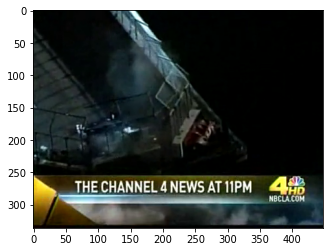

In [40]:
plt.imshow(vr[500].asnumpy())

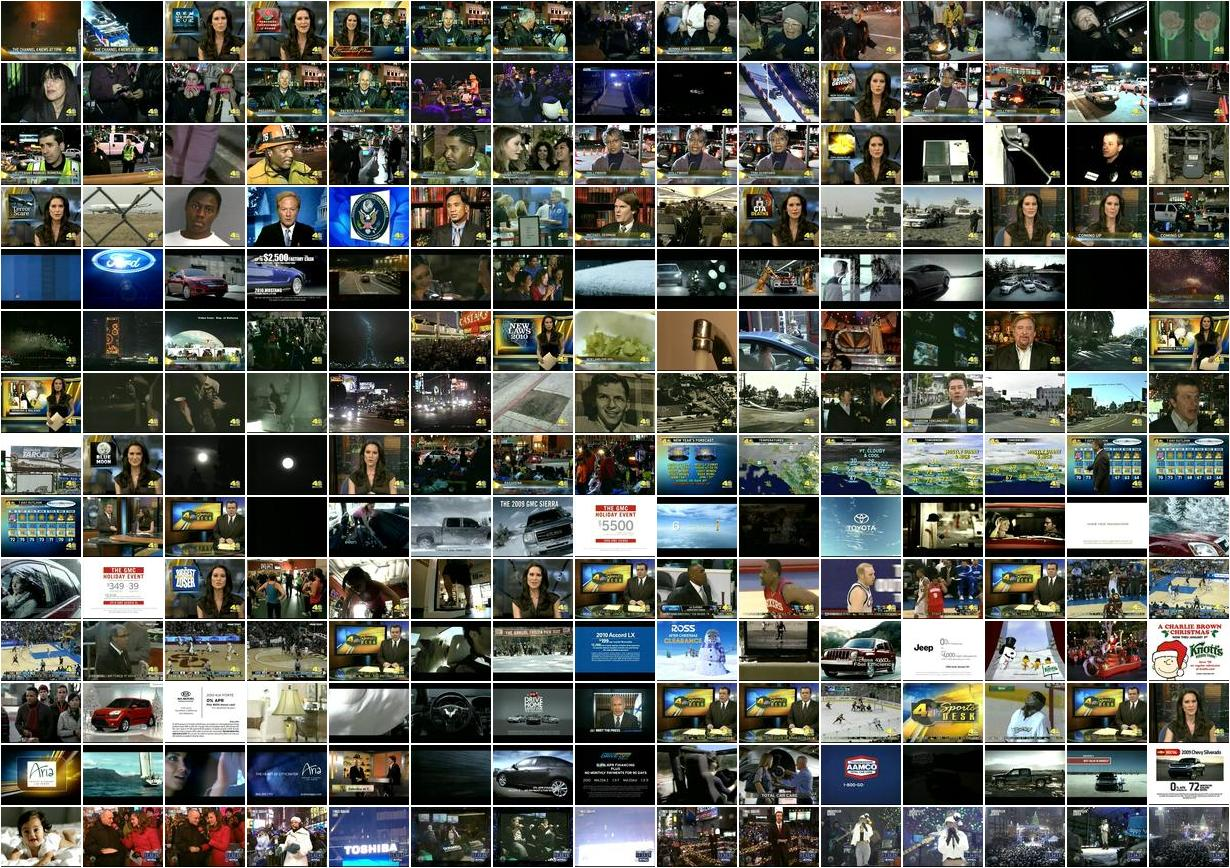

In [34]:
img = Image.open(c_path)
img

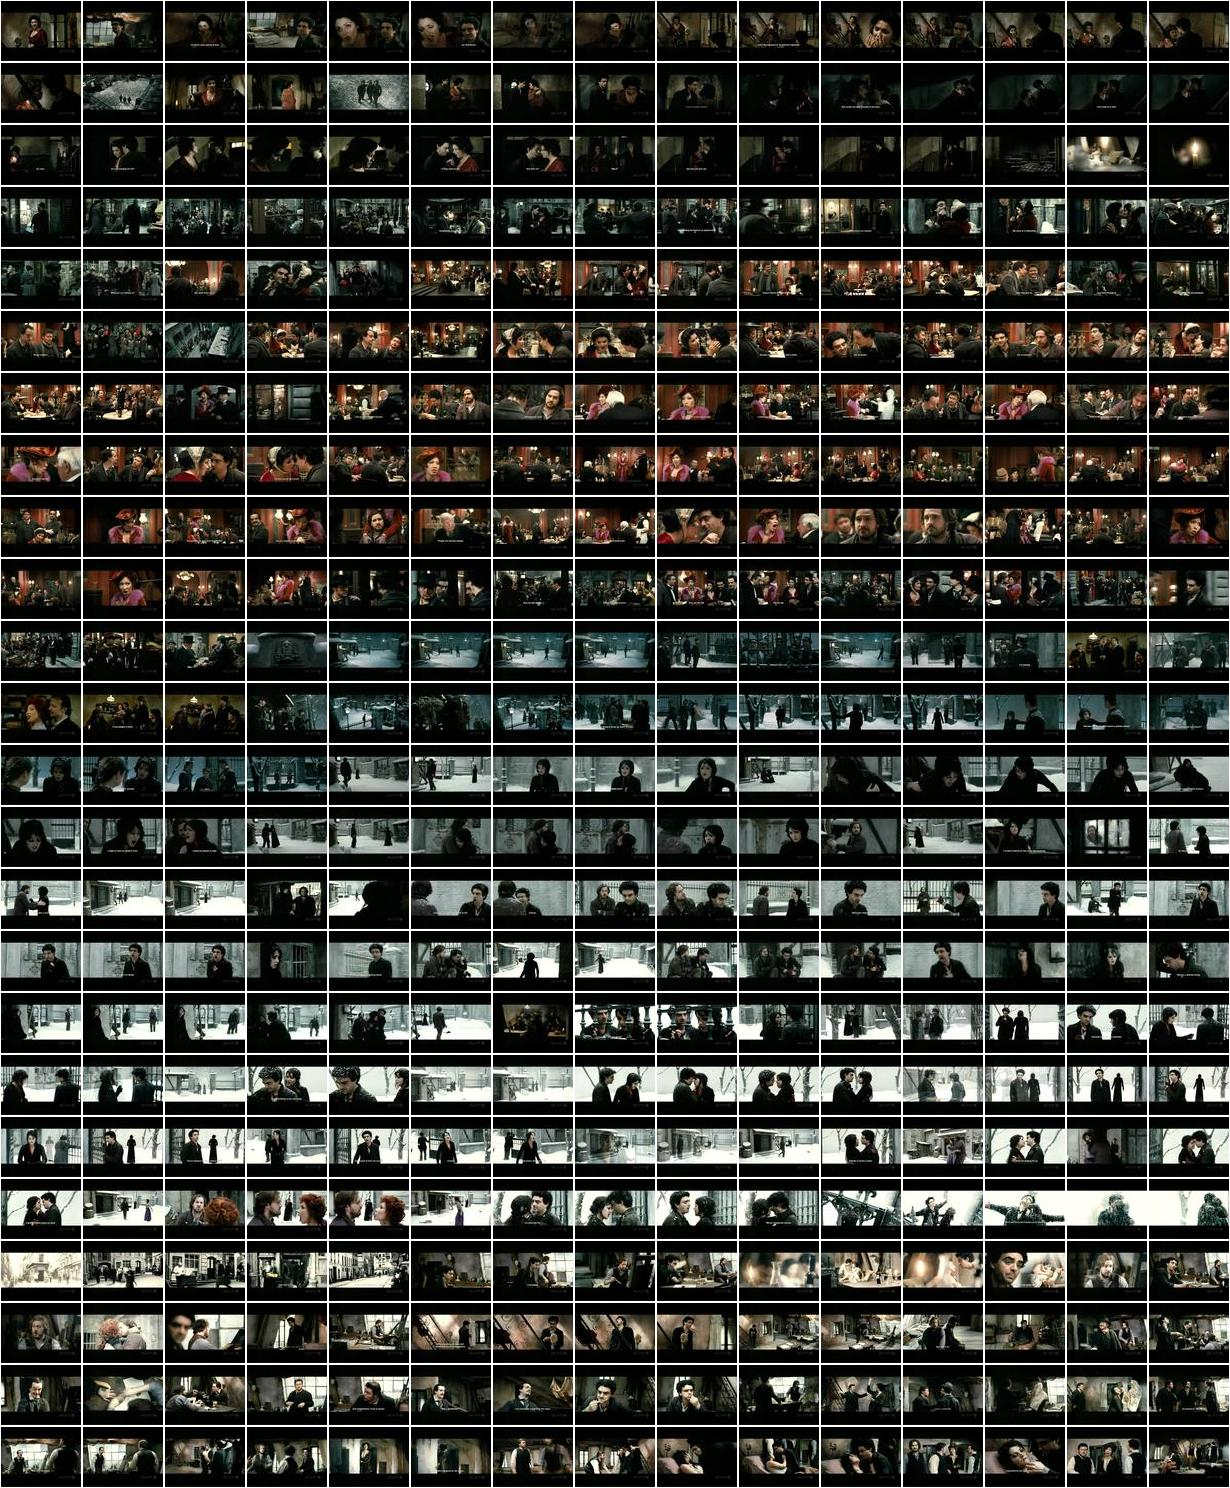

In [14]:
img

## Get Images to Label

In [84]:
images = []

In [85]:
const_keyframes = glob.glob(const.SCRATCH_PATH+'keyframes/*.npy')
shuffle(const_keyframes)
for file in const_keyframes:
    basename=os.path.basename(file)
    images.append(file)

#### Set images as commercial data 

In [129]:
images = commercial_images

In [130]:
for i in images:
    if " " in i:
        images.remove(i)

In [131]:
for i in range(len(images)):
    images[i] = images[i][:-4]+'.npy'

In [132]:
images

['/mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-04_0000_US_NA024558_V5_VHS40_MB16_H35_JM_keyframes.npy',
 '/mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-04_0000_US_NA024558_V5_VHS40_MB16_H35_JM_keyframes.npy',
 '/mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-24_0000_US_NA024901_V9_VHS24_MB2_H24_CM_keyframes.npy',
 '/mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-04_0000_US_NA024556_V3_VHS24_MB2_H24_JM_keyframes.npy',
 '/mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-04_0000_US_NA024556_V3_VHS24_MB2_H24_JM_keyframes.npy',
 '/mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-14_0000_US_NA024738_V6_VHS52_MB4_H31_CM_keyframes.npy',
 '/mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-08-04_0000_US_NA024556_V3_VHS24_MB2_H24_JM_keyframes.npy',
 '/mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989-09-08_0000_US_NA025145_V8_VHS52_MB4_H31_LA_keyframes.npy',
 '/mnt/rds/redhen/gall

---

In [86]:
images

['/scratch/users/hxm471/keyframes/1996-07-12_0000_US_00041465_V3_VHS24_MB38_H25_DA_keyframes.npy',
 '/scratch/users/hxm471/keyframes/1996-10-01_0000_US_00012232_V2_VHS27_MB12_H5_SC_BE_keyframes.npy',
 '/scratch/users/hxm471/keyframes/1998-05-08_0000_US_00028256_V1_VHS31_MB25_H13_KC_keyframes.npy',
 '/scratch/users/hxm471/keyframes/1997-02-06_0000_US_00026112_V2_VHS15_MB4_H12_JS_keyframes.npy',
 '/scratch/users/hxm471/keyframes/2000-08-15_0000_US_00011550_V3_VHS28_MB3_E3_MS_keyframes.npy',
 '/scratch/users/hxm471/keyframes/1997-02-17_0000_US_00017275_V1_VHS24_MB16_H2_NV_keyframes.npy',
 '/scratch/users/hxm471/keyframes/2000-05-23_0000_US_00012507_V3_VHSP12_MB20_H17_CV_keyframes.npy',
 '/scratch/users/hxm471/keyframes/2001-11-07_0000_US_00009182_V3_VHSP11_MB6_H8_GG_keyframes.npy',
 '/scratch/users/hxm471/keyframes/2005-11-18_0000_US_00000986_V3_MB8_VHSP5_EB1_KE_keyframes.npy',
 '/scratch/users/hxm471/keyframes/1997-03-19_0000_US_00026975_V3_VHSP21_M8_H6_KC_keyframes.npy',
 '/scratch/user

## Label Images

In [124]:
def get_user_input():
    label = input("label:  ")
    return label

In [125]:
def map_index(path,idx,column):
    txt_path = path[:-3]+'txt'
    try:
        f = open(txt_path)
    except:
        return (None,None,None)
    content = f.readlines()
    split_content = content[idx//3].split(' ')
    timestamp = str(int(float(split_content[7])))+'_'+\
                    str(int(float(split_content[-1].strip())))
    return (split_content[2+column],timestamp)

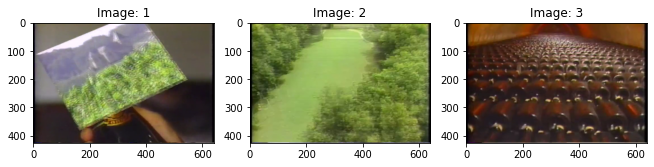

Now showing: /mnt/rds/redhen/gallina/home/hxm471/keyframes/keyframes/1989 08 09 0000 US NA024656 V8 VHS35 MB5 H9 LA_keyframes.npy
label:  3
3
Saving File: /mnt/rds/redhen/gallina/home/hxm471//image_dataset/unknown/1989 08 09 0000 US NA024656 V8 VHS35 MB5 H9 LA_keyframes_22073_719_749
Saving File: /mnt/rds/redhen/gallina/home/hxm471//image_dataset/unknown/1989 08 09 0000 US NA024656 V8 VHS35 MB5 H9 LA_keyframes_21967_719_749
Saving File: /mnt/rds/redhen/gallina/home/hxm471//image_dataset/unknown/1989 08 09 0000 US NA024656 V8 VHS35 MB5 H9 LA_keyframes_22194_719_749


KeyboardInterrupt: Interrupted by user

In [126]:
random.shuffle(images)
for f in images:
    print(f)
    imgs = np.load(f, allow_pickle=True)
    for _ in range(20):
        rand = random.randint(0,(imgs.shape[0]-1)//3)
        indx = rand*3
#         print("Index:",indx)
        fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(11,6))
        img_list = []
        
        
        
        
        for j, ax in enumerate(axs.flatten()):
            plt.sca(ax)
            plt.imshow(imgs[indx+j])
            #plt.colorbar()
            plt.title('Image: {}'.format(j+1))
            frame,timestamp = map_index(f,indx,j)
            img_list.append((Image.fromarray(imgs[indx+j]),frame,timestamp))

        plt.show()
        print(f'Now showing: {f}')
        
        label = get_user_input()
        if label!='':
            print(label)
            label_dir=''
            if(label=='1'):
                label_dir='title'
            elif(label=='2'):
                label_dir='commercial'
            else:
                label_dir='unknown'
            for im,frame,timestamp in img_list:
                if(im==None):
                    continue
                final_des_path = os.path.join(output_path,
                                              label_dir,
                                              os.path.basename(f)[:-4]
                                              +'_'+str(frame)+'_'+str(timestamp))
                print('Saving File:',final_des_path)
                im.save(final_des_path+'.jpeg',"JPEG")

        if input("Press any key to continue or 'q' to quit")!='q':
            clear_output()
            continue
        else:
            break
        clear_output()